In [1]:
# import all of things that you need
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
from __future__ import division
#! cp /home/wschrein/001/Figure1n/chronic_diff_expression .
#! cp /home/wschrein/001/Figure1n/c_elegans.PRJNA13758.WS266.geneIDs.txt .

In [2]:
reads=pd.read_csv('normalized_DESEQ2_READS.csv')
reads.rename(columns={'Unnamed: 0':'WB_ID'},inplace=True)

In [3]:
writer=pd.ExcelWriter("Supplementary_Figure3.xlsx")

In [4]:
# import the things that you need 
norm_counts_deseq2=pd.read_csv('chronic_diff_expression')
norm_counts_deseq2=norm_counts_deseq2.rename(columns={'Unnamed: 0': 'WB_ID'})
norm_counts_deseq2.head(1)

# import these so that we can get gene name and transcript ID for each gene
wormbase_ids=pd.read_csv('c_elegans.PRJNA13758.WS266.geneIDs.txt',names=['numba','WB_ID','common_name','transcript','status','description'])

# import list of introns with their scores so you can get a score for each gene 
# 
#scores_for_merging=pd.read_csv('intron_retention_score.csv',index_col=0)

# import all of the reads per replicate 
#deseq2_reads=pd.read_csv('normalized_DESEQ2_READS.csv')
#deseq2_reads=deseq2_reads.rename(columns={'Unnamed: 0': 'WB_ID'})

In [5]:
wormbase_ids.head()

,numba,WB_ID,common_name,transcript,status,description
0,6239,WBGene00000001,aap-1,Y110A7A.10,Live,protein_coding_gene
1,6239,WBGene00000002,aat-1,F27C8.1,Live,protein_coding_gene
2,6239,WBGene00000003,aat-2,F07C3.7,Live,protein_coding_gene
3,6239,WBGene00000004,aat-3,F52H2.2,Live,protein_coding_gene
4,6239,WBGene00000005,aat-4,T13A10.10,Live,protein_coding_gene


In [6]:
df=pd.merge(wormbase_ids,norm_counts_deseq2)


In [7]:
wormbase_ids.head()

,numba,WB_ID,common_name,transcript,status,description
0,6239,WBGene00000001,aap-1,Y110A7A.10,Live,protein_coding_gene
1,6239,WBGene00000002,aat-1,F27C8.1,Live,protein_coding_gene
2,6239,WBGene00000003,aat-2,F07C3.7,Live,protein_coding_gene
3,6239,WBGene00000004,aat-3,F52H2.2,Live,protein_coding_gene
4,6239,WBGene00000005,aat-4,T13A10.10,Live,protein_coding_gene


In [8]:
df = df.replace(np.nan, '', regex=True)


In [9]:
df_linc=df[df.description.str.contains('linc')]

df_tts=df[df.common_name.str.contains('tts-1')]

df_rncs_1=df[df.common_name.str.contains("rncs")]

In [10]:
df_rncs_1

,numba,WB_ID,common_name,transcript,status,description,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
19130,6239,WBGene00023069,rncs-1,F55A4.9,Live,ncRNA_gene,368.186938,-1.157076,0.488004,-2.37104,0.0177381,0.0545087


In [11]:
df_linc.head()

,numba,WB_ID,common_name,transcript,status,description,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
7994,6239,WBGene00010424,lep-5,H36L18.2,Live,lincRNA_gene,4165.910761,0.995963,0.223870,4.448839,8.63357e-06,8.96281e-05
11893,6239,WBGene00014836,,T09F5.12,Live,lincRNA_gene,735.609262,3.574615,0.397773,8.986571,2.55063e-19,1.96344e-17
14621,6239,WBGene00017941,,F31A9.2,Live,lincRNA_gene,2.676219,-2.498197,2.107489,-1.185390,0.235863,0.376543
25531,6239,WBGene00189951,linc-29,Y73B6BL.269,Live,lincRNA_gene,54.229745,-1.475327,0.474844,-3.106973,0.00189013,0.00918634
25569,6239,WBGene00194659,linc-1,W09C5.11,Live,lincRNA_gene,53.975940,3.464590,0.549316,6.307103,2.84307e-10,7.51053e-09


In [12]:
pgate = df_linc['padj'] < .01
fc_gate = df_linc['log2FoldChange'] > 1
bm_gate=df_linc['baseMean'] > 50
up=df_linc[pgate & fc_gate & bm_gate ]
len(up)

8

In [13]:
jacob_lincs=pd.read_table('Will.HS.ncRNAs.lincs.txt')
jacob_lincs[jacob_lincs['HSE.lax.HSF1.number']==1] # none of the up lincs have an HSE, entonces no tienes que preocuparte

/home/wschrein/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


,WB.ID,gene.name,chrom,start,end,strand,sequence.name,HSE.lax.HSF1.number,UP
28,WBGene00219571,linc-15,chrX,11991484,11991933,-,C49F5.10,1,False
145,WBGene00219746,linc-91,chrI,4699610,4702866,+,W09C3.9,1,False


In [14]:
up_for_saving=pd.concat([up,df_tts])

In [15]:
up_for_saving.to_csv('all_up_lincs_for_jacob.csv')

In [16]:
up_for_excel=up_for_saving

In [17]:
up_for_excel.drop(["numba","status","description",'lfcSE','stat',"pvalue"],axis=1,inplace=True)

In [18]:
up_for_excel.to_excel(writer,'up_lincs',index=False)

In [19]:



all_of_the_lincs=pd.concat([df_linc,df_rncs_1,df_tts])

In [20]:
all_of_the_lincs.head(1)

,numba,WB_ID,common_name,transcript,status,description,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
7994,6239,WBGene00010424,lep-5,H36L18.2,Live,lincRNA_gene,4165.910761,0.995963,0.22387,4.448839,8.63357e-06,8.96281e-05


In [21]:
all_of_the_lincs_for_excel=all_of_the_lincs

In [22]:
all_of_the_lincs_for_excel.drop(["numba","status","description",'lfcSE','stat',"pvalue"],axis=1,inplace=True)

In [23]:
all_of_the_lincs_for_excel.to_excel(writer,'all_lincs',index=False)

In [24]:
pgate = df_linc['padj'] < .01
fc_gate = df_linc['log2FoldChange'] < -1
down_bm_gate=df_linc['baseMean'] > 50
down=df_linc[pgate & fc_gate & down_bm_gate ]
len(down)

1

In [25]:
down_for_excel=down

In [26]:
down_for_excel=down_for_excel.drop(["numba","status","description",'lfcSE','stat',"pvalue"],axis=1)

In [27]:
down_for_excel.to_excel(writer,'down_linc')

In [28]:
len(df_linc)

160

In [29]:
len(all_of_the_lincs)

162

# hay otros tipos de ncRNA que sean interesantes pa' que podemos ver

In [30]:
df.drop(['numba','lfcSE','stat','pvalue'],axis=1,inplace=True)


In [31]:
all_reads=pd.read_csv('normalized_DESEQ2_READS.csv')
all_reads.rename(columns={'Unnamed: 0':'WB_ID'},inplace=True)

# pseudogenes

In [32]:
df_pseudo=df[df.description.str.contains("pseudo")]

len(df_pseudo)

1455

In [33]:
df_pseudo=pd.merge(df_pseudo,all_reads,on='WB_ID')

In [34]:
ps_change=[]
for index,row in df_pseudo.iterrows():
    if row.log2FoldChange>1 and row.padj<.05 and row.baseMean>50:
        ps_change.append("up")
    elif row.log2FoldChange<-1 and row.padj<.05 and row.baseMean>50:
        ps_change.append("down")
    else:
        ps_change.append("no_change")

df_pseudo['change']=ps_change        

In [35]:
df_pseudo_up=df_pseudo[df_pseudo.change=='up']


In [36]:
df_pseudo_down=df_pseudo[df_pseudo.change=='down']

In [37]:
df_pseudo_down.to_excel(writer,'down_pseudo_genes')
df_pseudo_up.to_excel(writer,'up_pseudo_genes')
df_pseudo.to_excel(writer,'all_pseudo_genes')

# other non-coding RNAs

In [38]:
df_ncRNA=df[df.description.str.contains("ncRNA")]

print(len(df_ncRNA))

4810


In [39]:
# now get rid of the lincs
df_ncRNA=df_ncRNA[~df_ncRNA.description.str.contains("lincRNA")]
df_ncRNA=df_ncRNA[~df_ncRNA.common_name.str.contains("rncs-1")]
df_ncRNA=df_ncRNA[~df_ncRNA.common_name.str.contains("tts-1")]

In [40]:
nc_change=[]
for index,row in df_ncRNA.iterrows():
    if row.log2FoldChange>1 and row.padj <.01 and row.baseMean>50:
        nc_change.append("up")
    elif row.log2FoldChange<-1 and row.padj <.01 and row.baseMean>50:
        nc_change.append("down")
    else:
        nc_change.append("no_change")
df_ncRNA['change']=nc_change

In [41]:
df_ncRNA_up=df_ncRNA[df_ncRNA.change=='up']
df_ncRNA_down=df_ncRNA[df_ncRNA.change=='down']

In [42]:
df_ncRNA_up.to_excel(writer,'up_ncRNAs')
df_ncRNA_down.to_excel(writer,'down_ncRNAs')
df_ncRNA.to_excel(writer,'all_ncRNAs_detected')

In [43]:
all_ncRNA= df[(df.description.str.contains("ncRNA")) | (df.description=='pseudogene')]
all_ncRNA=pd.merge(all_ncRNA,reads,on='WB_ID')

In [89]:
df_ncRNA[df_ncRNA.common_name.str.contains("anr")]

,WB_ID,common_name,transcript,status,description,baseMean,log2FoldChange,padj,change,N2_CTR_1,N2_CTR_3,N2_CTR_4,N2_HS_1,N2_HS_3,N2_HS_4
4303,WBGene00219557,anr-14,B0019.4,Live,ncRNA,4.442083,-0.261727,0.922293,no_change,2.046762,3.460316,9.095506,10.966710,0.000000,1.083205
4304,WBGene00219558,anr-12,C01B9.8,Live,ncRNA,2.941224,0.596061,0.828284,no_change,2.046762,1.384126,3.498272,0.000000,7.468567,3.249615
4305,WBGene00219568,anr-9,C46F11.9,Live,ncRNA,3.333687,2.640065,0.317315,no_change,2.729015,0.000000,0.000000,6.854194,9.335709,1.083205
4306,WBGene00219573,anr-30,C54D10.21,Live,ncRNA,9.030923,2.101779,0.31063,no_change,10.233808,0.000000,0.000000,5.483355,16.804275,21.664099
4307,WBGene00219575,anr-8,D1046.17,Live,ncRNA,29.867999,-0.792171,0.295088,no_change,30.701424,44.292043,39.180643,21.933420,14.937134,28.163329
4308,WBGene00219576,anr-13,F01G4.7,Live,ncRNA,0.113709,0.061228,,no_change,0.682254,0.000000,0.000000,0.000000,0.000000,0.000000
4309,WBGene00219581,anr-20,F16A11.10,Live,ncRNA,21.292071,2.188941,0.0443668,no_change,6.140285,13.149200,3.498272,10.966710,69.084243,24.913714
4310,WBGene00219582,anr-25,F16A11.11,Live,ncRNA,6.253071,2.544297,0.303277,no_change,4.093523,0.000000,1.399309,30.158452,1.867142,0.000000
4311,WBGene00219583,anr-43,F17C11.23,Live,ncRNA,0.227418,-0.818203,,no_change,1.364508,0.000000,0.000000,0.000000,0.000000,0.000000
4312,WBGene00219587,anr-16,F29G6.5,Live,ncRNA,19.062584,1.202544,0.383089,no_change,19.785362,3.460316,11.194469,2.741677,52.279968,24.913714


In [44]:
writer.close()
writer.save()

In [45]:
%load_ext rpy2.ipython

In [46]:
all_ncRNA.head(1)

,WB_ID,common_name,transcript,status,description,baseMean,log2FoldChange,padj,N2_CTR_1,N2_CTR_3,N2_CTR_4,N2_HS_1,N2_HS_3,N2_HS_4
0,WBGene00000021,abt-3,F55G11.9,Live,pseudogene,100.551098,1.7267,0.00814993,75.047926,13.841263,51.074766,165.871487,151.238479,146.23267


In [47]:
alt_description=[]

In [48]:
real_description=[]



for index, row in all_ncRNA.iterrows():
    if row.description=='lincRNA_gene':
        real_description.append("linc")
    elif row.description=='ncRNA':
        real_description.append("ncRNA")
    elif row.description=="pseudogene":
        real_description.append("pseudogene")
    elif row.description=='ncRNA_gene':
        real_description.append("ncRNA")
    else:
        real_description.append("no_se")
    
all_ncRNA['real_description']=real_description

In [49]:
alt_description=[]



for index, row in all_ncRNA.iterrows():
    if row.description=='lincRNA_gene':
        alt_description.append("linc")
    elif row.description=='ncRNA' and "anr" in row.common_name:
        alt_description.append("antisense")
    elif row.description=='ncRNA':
        alt_description.append("ncRNA")
    elif row.description=="pseudogene":
        alt_description.append("pseudogene")
    elif row.description=='ncRNA_gene':
        alt_description.append("ncRNA")
    else:
        alt_description.append("no_se")
    
all_ncRNA['alt_description']=alt_description

In [50]:
all_ncRNA.to_csv('all_ncRNA_for_graphing.csv')

In [51]:
all_ncRNA[all_ncRNA.common_name.str.contains("anr")].head()

,WB_ID,common_name,transcript,status,description,baseMean,log2FoldChange,padj,N2_CTR_1,N2_CTR_3,N2_CTR_4,N2_HS_1,N2_HS_3,N2_HS_4,real_description,alt_description
5741,WBGene00219557,anr-14,B0019.4,Live,ncRNA,4.442083,-0.261727,0.922293,2.046762,3.460316,9.095506,10.966710,0.000000,1.083205,ncRNA,antisense
5742,WBGene00219558,anr-12,C01B9.8,Live,ncRNA,2.941224,0.596061,0.828284,2.046762,1.384126,3.498272,0.000000,7.468567,3.249615,ncRNA,antisense
5752,WBGene00219568,anr-9,C46F11.9,Live,ncRNA,3.333687,2.640065,0.317315,2.729015,0.000000,0.000000,6.854194,9.335709,1.083205,ncRNA,antisense
5757,WBGene00219573,anr-30,C54D10.21,Live,ncRNA,9.030923,2.101779,0.31063,10.233808,0.000000,0.000000,5.483355,16.804275,21.664099,ncRNA,antisense
5759,WBGene00219575,anr-8,D1046.17,Live,ncRNA,29.867999,-0.792171,0.295088,30.701424,44.292043,39.180643,21.933420,14.937134,28.163329,ncRNA,antisense


# lincGraphs

In [52]:
all_of_the_lincs.reset_index(drop=True,inplace=True)

In [53]:
lincs_for_graphing=pd.merge(all_of_the_lincs,reads,on='WB_ID')

In [54]:
linc_change=[]
for index,row in lincs_for_graphing.iterrows():
    if row.baseMean>50 and row.log2FoldChange >1 and row.padj<.01:
        linc_change.append("up")
    elif row.baseMean>50 and row.log2FoldChange <-1 and row.padj <.01:
        linc_change.append("down")
    else:
        linc_change.append("no")

lincs_for_graphing['change']=linc_change

In [55]:
lincs_for_graphing.to_csv('lincs_for_graphing.csv')

In [56]:
%%R
library("ggplot2")
ln <- read.csv('lincs_for_graphing.csv')




ln$ct_ave <- ((ln$N2_CTR_1 +ln$N2_CTR_3 + ln$N2_CTR_4)/3)

ln$hs_ave <- ((ln$N2_HS_1 +ln$N2_HS_3 + ln$N2_HS_4)/3)

ln$l2_ct <- log2(ln$ct_ave)

ln$l2_hs <- log2(ln$hs_ave)

#deseq2_res$l2_ctr <- log2(deseq2_res$N2_Chr_CTL6 + deseq2_res$N2_Chr_CTL22)

#deseq2_res$l2_hs <- log2(deseq2_res$N2_Chr_HS5 + deseq2_res$N2_Chr_HS21)

/home/wschrein/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Saving 6.67 x 6.67 in image

  warnings.warn(x, RRuntimeWarning)


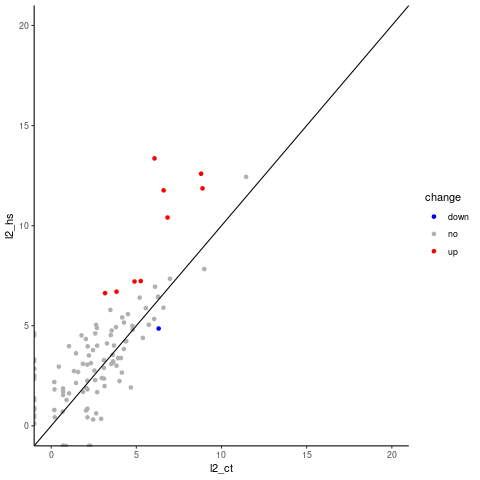

In [57]:
%%R

z <- ggplot(ln,aes(l2_ct,l2_hs))  + geom_point(aes(colour=change)) +geom_abline(slope = 1)

z <- z + scale_color_manual(breaks = c("down", "no", "up"),
                        values=c("blue", "grey69", "red"))
z <- z + xlim(0,20) +ylim(0,20)

z <- z + theme_classic()

z
ggsave('linc.png')
z

In [58]:
# edit pseudogene graphs


cat=[]
for index,row in df_pseudo.iterrows():
    if row.change=='up' and row.common_name=='dct-10':
        cat.append(row.common_name)
    else:
        cat.append('')
df_pseudo['cat']=cat
df_pseudo

,WB_ID,common_name,transcript,status,description,baseMean,log2FoldChange,padj,N2_CTR_1,N2_CTR_3,N2_CTR_4,N2_HS_1,N2_HS_3,N2_HS_4,change,cat
0,WBGene00000021,abt-3,F55G11.9,Live,pseudogene,100.551098,1.726700,0.00814993,75.047926,13.841263,51.074766,165.871487,151.238479,146.232670,up,
1,WBGene00000026,abu-3,F31A3.1,Live,pseudogene,1.917020,4.895569,0.20361,0.000000,0.000000,0.000000,0.000000,9.335709,2.166410,no_change,
2,WBGene00000191,arl-7,F20D1.5,Live,pseudogene,29.840343,0.679863,0.574701,42.981994,4.844442,20.989630,12.337549,44.811401,53.077043,no_change,
3,WBGene00000374,cyp-31A1,C01F6.3,Live,pseudogene,183.161296,-0.022195,0.967608,154.871629,229.764973,168.616694,213.850842,186.714171,145.149465,no_change,
4,WBGene00000642,col-66,F15D3.3,Live,pseudogene,24.243775,2.195210,0.070464,17.056347,8.996821,0.000000,45.237678,37.342834,36.828969,no_change,
5,WBGene00000709,col-136,Y51H4A.28,Live,pseudogene,6.487840,1.729188,0.4596,6.140285,0.000000,2.798617,0.000000,22.405701,7.582435,no_change,
6,WBGene00000801,cars-2,Y23H5A.1,Live,pseudogene,172.523507,-0.381938,0.502163,167.834452,220.076088,198.002176,239.896778,106.427078,102.904472,no_change,
7,WBGene00001091,drh-2,C01B10.1,Live,pseudogene,1427.050972,1.601767,2.76125e-06,900.575110,539.809273,681.463318,2852.715403,1925.023105,1662.719621,up,
8,WBGene00001111,duo-2,F29C4.5,Live,pseudogene,6.291660,-1.380821,0.459647,6.822539,8.996821,11.894124,1.370839,0.000000,8.665640,no_change,
9,WBGene00001605,gln-4,T25C8.3,Live,pseudogene,123.961328,1.953091,6.30925e-07,51.851294,42.215853,58.770964,156.275616,194.182738,240.471502,up,


# pseudogene_graphs

In [59]:
#df_pseudo.to_csv('pseudo_for_graphing.csv') # commented out so can be labeled manually 

In [60]:
%%R
library("ggplot2")

In [61]:
%%R
ps <- read.csv('pseudo_for_graphing.csv')
head(ps)

     X          WB_ID common_name transcript status description   baseMean
1  325 WBGene00010536                K03D7.9   Live  pseudogene  111.45002
2 1264 WBGene00050938              F23H12.11   Live  pseudogene   54.89926
3 1066 WBGene00023398               ZC123.t1   Live  pseudogene  430.98925
4  437 WBGene00013155               Y53F4B.8   Live  pseudogene 1762.83587
5  408 WBGene00012618      dct-10   Y38H6C.5   Live  pseudogene 2501.10746
6  981 WBGene00023255               C45H4.t1   Live  pseudogene   26.96320
  log2FoldChange     padj   N2_CTR_1  N2_CTR_3  N2_CTR_4    N2_HS_1    N2_HS_3
1      10.775062 1.27e-15  0.0000000  0.000000  0.000000  334.48465  192.31560
2       9.754982 1.99e-10  0.0000000  0.000000  0.000000  242.63846   46.67854
3       9.279591 6.77e-35  0.6822539  0.000000  3.498272 1359.87202  655.36674
4       9.098298 6.34e-15  8.8693003 10.380948  0.000000 4329.10872 2755.90117
5       8.946350 8.67e-75 17.0563468  1.384126 11.894124 5240.71648 3657.73061
6

In [62]:
%%R


ps$ct_ave <- ((ps$N2_CTR_1 +ps$N2_CTR_3 + ps$N2_CTR_4)/3)

ps$hs_ave <- ((ps$N2_HS_1 +ps$N2_HS_3 + ps$N2_HS_4)/3)

ps$l2_ct <- log2(ps$ct_ave)

ps$l2_hs <- log2(ps$hs_ave)

#deseq2_res$l2_ctr <- log2(deseq2_res$N2_Chr_CTL6 + deseq2_res$N2_Chr_CTL22)

#deseq2_res$l2_hs <- log2(deseq2_res$N2_Chr_HS5 + deseq2_res$N2_Chr_HS21)

In [63]:
%%R
head(ps)

     X          WB_ID common_name transcript status description   baseMean
1  325 WBGene00010536                K03D7.9   Live  pseudogene  111.45002
2 1264 WBGene00050938              F23H12.11   Live  pseudogene   54.89926
3 1066 WBGene00023398               ZC123.t1   Live  pseudogene  430.98925
4  437 WBGene00013155               Y53F4B.8   Live  pseudogene 1762.83587
5  408 WBGene00012618      dct-10   Y38H6C.5   Live  pseudogene 2501.10746
6  981 WBGene00023255               C45H4.t1   Live  pseudogene   26.96320
  log2FoldChange     padj   N2_CTR_1  N2_CTR_3  N2_CTR_4    N2_HS_1    N2_HS_3
1      10.775062 1.27e-15  0.0000000  0.000000  0.000000  334.48465  192.31560
2       9.754982 1.99e-10  0.0000000  0.000000  0.000000  242.63846   46.67854
3       9.279591 6.77e-35  0.6822539  0.000000  3.498272 1359.87202  655.36674
4       9.098298 6.34e-15  8.8693003 10.380948  0.000000 4329.10872 2755.90117
5       8.946350 8.67e-75 17.0563468  1.384126 11.894124 5240.71648 3657.73061
6

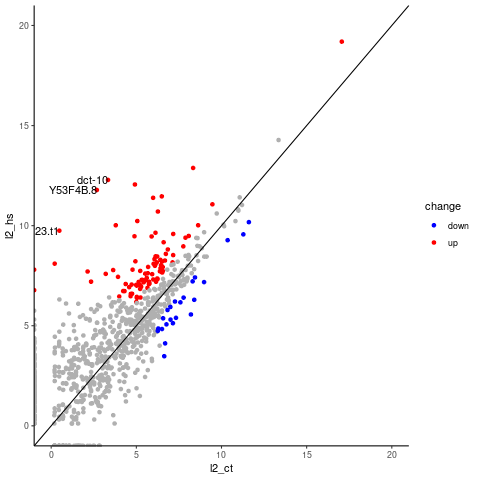

In [64]:
%%R

z <- ggplot(ps,aes(l2_ct,l2_hs))  + geom_point(aes(colour=change)) +geom_abline(slope = 1)

z <- z + geom_text(data = ps, aes(l2_ct,l2_hs,label=cat, hjust=1))

z <- z + scale_color_manual(breaks = c("down", "no", "up"),
                        values=c("blue", "grey69", "red"))
z <- z + xlim(0,20) +ylim(0,20)

z <- z + theme_classic()

ggsave('pseudogene.png')
z

# ncRNA_graphs

In [65]:
len(df_ncRNA)

4648

In [66]:
df_ncRNA=pd.merge(df_ncRNA,reads,on='WB_ID')

In [67]:
#df_ncRNA.to_csv('df_ncRNA_for_graphing.csv',index=False)

In [68]:
%%R
nc =read.csv('df_ncRNA_for_graphing.csv')

In [69]:
%%R
head(nc)

           WB_ID common_name transcript status description  baseMean
1 WBGene00197228                T06E8.3   Live  ncRNA_gene  606.6879
2 WBGene00195705             Y37A1B.330   Live  ncRNA_gene  416.1747
3 WBGene00197215                F57A8.9   Live  ncRNA_gene 6364.2322
4 WBGene00198348                T06E8.4   Live  ncRNA_gene  263.0839
5 WBGene00197545              Y53F4B.55   Live  ncRNA_gene  123.7074
6 WBGene00199742                T06E8.6   Live  ncRNA_gene  116.8229
  log2FoldChange      padj change N2_CTR_1 N2_CTR_3 N2_CTR_4    N2_HS_1
1       13.22059  9.01e-26     up        0  0.00000 0.000000  1170.6963
2       12.67614  2.46e-22     up        0  0.00000 0.000000  1251.5758
3       12.58189 6.42e-117     up        0  2.07619 4.197926 11601.4082
4       12.01494  1.13e-20     up        0  0.00000 0.000000   389.3182
5       10.92686  1.34e-16     up        0  0.00000 0.000000   334.4847
6       10.84288  1.58e-16     up        0  0.00000 0.000000   180.9507
     N2_HS_3 

In [70]:
%%R
nc$ctr_ave <- ((nc$N2_CTR_1 + nc$N2_CTR_3 + nc$N2_CTR_4)/3)
nc$hs_ave <- ((nc$N2_HS_1 + nc$N2_HS_3 + nc$N2_HS_4)/3)


nc$l2_ctr <- log2(nc$ctr_ave)
nc$l2_hs <- log2(nc$hs_ave)

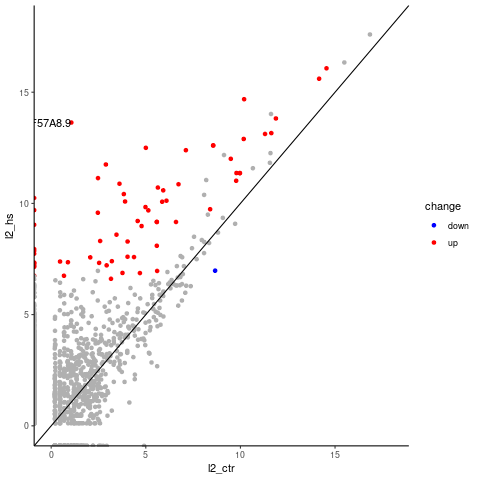

In [71]:
%%R

z <- ggplot(nc,aes(l2_ctr,l2_hs))  + geom_point(aes(colour=change)) +geom_abline(slope = 1)

z <- z + scale_color_manual(breaks = c("down", "no", "up"),
                        values=c("blue", "grey69", "red"))
z <- z + xlim(0,18) +ylim(0,18)

z <- z + theme_classic()

z <- z + geom_text(data = nc, aes(l2_ctr,l2_hs,label=cat, hjust=1))



ggsave("ncRNA.png")

z

In [72]:
%%R
df <- read.csv('all_ncRNA_for_graphing.csv')

In [73]:
%%R
head(df)

  X          WB_ID common_name transcript status description  baseMean
1 0 WBGene00000021       abt-3   F55G11.9   Live  pseudogene 100.55110
2 1 WBGene00000026       abu-3    F31A3.1   Live  pseudogene   1.91702
3 2 WBGene00000191       arl-7    F20D1.5   Live  pseudogene  29.84034
4 3 WBGene00000374    cyp-31A1    C01F6.3   Live  pseudogene 183.16130
5 4 WBGene00000642      col-66    F15D3.3   Live  pseudogene  24.24377
6 5 WBGene00000709     col-136  Y51H4A.28   Live  pseudogene   6.48784
  log2FoldChange        padj   N2_CTR_1   N2_CTR_3   N2_CTR_4   N2_HS_1
1     1.72670044 0.008149935  75.047926  13.841263  51.074766 165.87149
2     4.89556874 0.203609795   0.000000   0.000000   0.000000   0.00000
3     0.67986328 0.574700525  42.981994   4.844442  20.989630  12.33755
4    -0.02219499 0.967607747 154.871629 229.764973 168.616694 213.85084
5     2.19520986 0.070464045  17.056347   8.996821   0.000000  45.23768
6     1.72918759 0.459600246   6.140285   0.000000   2.798617   0.00000

In [74]:
%%R
df$ctr_ave <- (df$N2_CTR_1 + df$N2_CTR_3+ df$N2_CTR_4)/3


df$hs_ave <- (df$N2_HS_1 + df$N2_HS_3 + df$N2_HS_4)/3

In [75]:
%%R

df$l2_ctr <- log2(df$ctr_ave)

df$l2_hs <- log2(df$hs_ave)

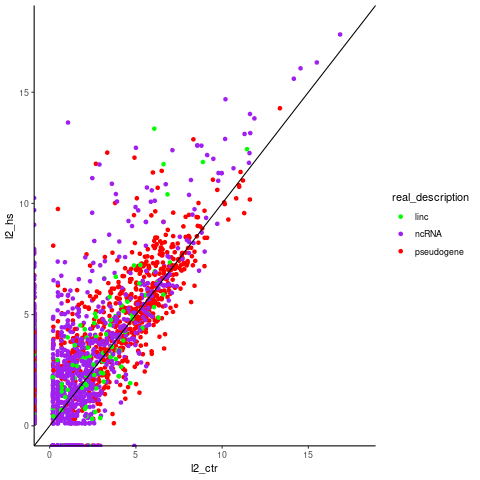

In [76]:
%%R

z <- ggplot(df,aes(l2_ctr,l2_hs))  + geom_point(aes(colour=real_description)) +geom_abline(slope = 1)

z <- z + scale_color_manual(breaks = c("linc", "ncRNA", "pseudogene"),
                       values=c("green", "purple", "red"))
z <- z + xlim(0,18) +ylim(0,18)

z + theme_classic()



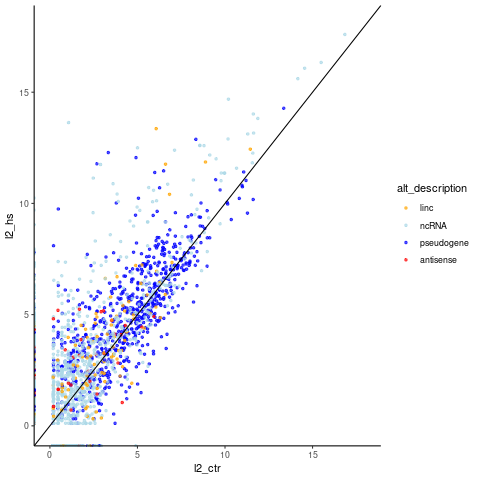

In [77]:
%%R

z <- ggplot(df,aes(l2_ctr,l2_hs))  + geom_point(aes(colour=alt_description),size=1,alpha=.7) +geom_abline(slope = 1)

z <- z + scale_color_manual(breaks = c("linc", "ncRNA", "pseudogene","antisense"),
                       values=c("red", "orange", "lightblue", "blue"))
z <- z + xlim(0,18) +ylim(0,18)

z + theme_classic()

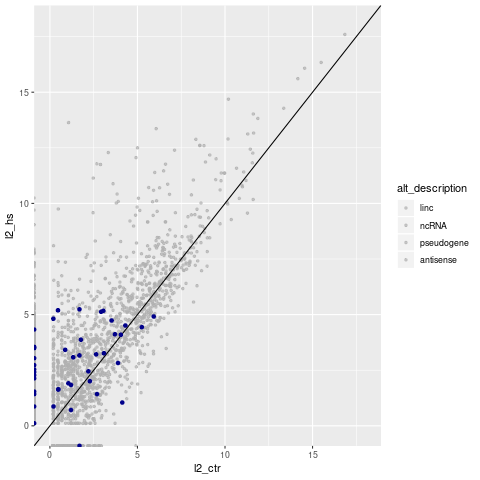

In [78]:
%%R

z <- ggplot(df,aes(l2_ctr,l2_hs))  + geom_point(aes(colour=alt_description),size=1,alpha=.7) +geom_abline(slope = 1)

z <- z + scale_color_manual(breaks = c("linc", "ncRNA", "pseudogene","antisense"),
                       values=c("grey69", "grey69", "grey69", "grey69"))
z <- z + xlim(0,18) +ylim(0,18)

z + geom_point(data=subset(df,alt_description=="antisense"),stat="identity",color='darkblue')


#z + geom_point(aes(colour=alt_description),size=1,alpha=.7)  + scale_color_manual(breaks = c("linc", "ncRNA", "pseudogene","antisense"),
#                       values=c("red", "grey69", "grey69", "grey69"))

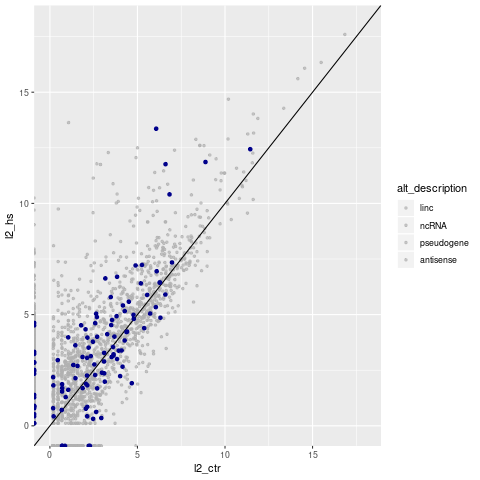

In [79]:
%%R

z <- ggplot(df,aes(l2_ctr,l2_hs))  + geom_point(aes(colour=alt_description),size=1,alpha=.7) +geom_abline(slope = 1)

z <- z + scale_color_manual(breaks = c("linc", "ncRNA", "pseudogene","antisense"),
                       values=c("grey69", "grey69", "grey69", "grey69"))
z <- z + xlim(0,18) +ylim(0,18)

z + geom_point(data=subset(df,alt_description=="linc"),stat="identity",color='darkblue')


#z + geom_point(aes(colour=alt_description),size=1,alpha=.7)  + scale_color_manual(breaks = c("linc", "ncRNA", "pseudogene","antisense"),
#                       values=c("red", "grey69", "grey69", "grey69"))

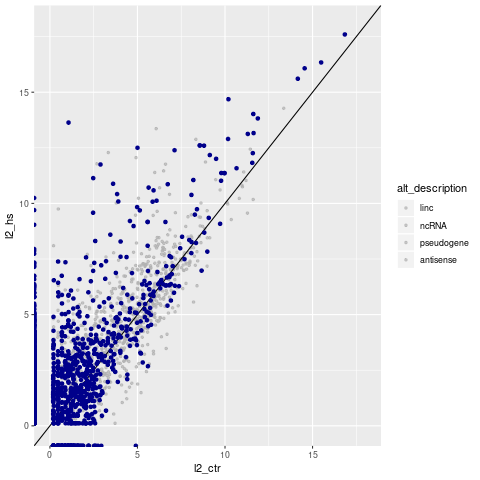

In [80]:
%%R

z <- ggplot(df,aes(l2_ctr,l2_hs))  + geom_point(aes(colour=alt_description),size=1,alpha=.7) +geom_abline(slope = 1)

z <- z + scale_color_manual(breaks = c("linc", "ncRNA", "pseudogene","antisense"),
                       values=c("grey69", "grey69", "grey69", "grey69"))
z <- z + xlim(0,18) +ylim(0,18)

z + geom_point(data=subset(df,alt_description=="ncRNA"),stat="identity",color='darkblue')


#z + geom_point(aes(colour=alt_description),size=1,alpha=.7)  + scale_color_manual(breaks = c("linc", "ncRNA", "pseudogene","antisense"),
#                       values=c("red", "grey69", "grey69", "grey69"))

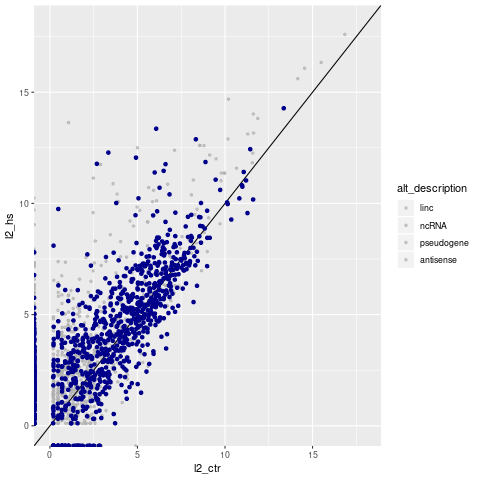

In [81]:
%%R

z <- ggplot(df,aes(l2_ctr,l2_hs))  + geom_point(aes(colour=alt_description),size=1,alpha=.7) +geom_abline(slope = 1)

z <- z + scale_color_manual(breaks = c("linc", "ncRNA", "pseudogene","antisense"),
                       values=c("grey69", "grey69", "grey69", "grey69"))
z <- z + xlim(0,18) +ylim(0,18)

z + geom_point(data=subset(df,alt_description=="pseudogene" | alt_description=="linc"),stat="identity",color='darkblue')


#z + geom_point(aes(colour=alt_description),size=1,alpha=.7)  + scale_color_manual(breaks = c("linc", "ncRNA", "pseudogene","antisense"),
#  

In [82]:
! ls

ALL_LINCS_detected.csv			linc.png
all_ncRNA_for_graphing.csv		Linc_R_BAR_graph.ipynb
all_up_lincs_for_jacob.csv		lincs_for_graphing.csv
c_elegans.PRJNA13758.WS266.geneIDs.txt	ncRNA.png
chronic_diff_expression			normalized_DESEQ2_READS.csv
df_ncRNA_for_graphing.csv		old_bar
edit_linc_bars.ipynb			parse_data_get_lincs.ipynb
hsp70.csv				pseudo_for_graphing.csv
hsp70_for_R.csv				pseudogene.png
hsp70_time_course.jpeg			pseugenes_graphing.ipynb
hsp70.txt				repeats.UP.HSEs.HSF1.txt
linc7_for_R.csv				Supplementary_Figure3.xlsx
linc7_time_course.jpeg			up_lincs.csv
linc7.txt				Will.HS.ncRNAs.lincs.txt
linc_bar_graph_correct.jpeg


In [83]:
import pandas as pd
import numpy as np

In [84]:
ele=pd.read_csv('c_elegans.PRJNA13758.WS266.geneIDs.txt',names=['numba','WB_ID','common_name',
                                                               'transcript','status','description'])

In [85]:
ele.drop('numba',axis=1,inplace=True)

In [86]:
ele[ele.description.str.contains('miR')]

,WB_ID,common_name,transcript,status,description
2219,WBGene00002285,let-7,C05G5.6,Live,miRNA_gene
2927,WBGene00002993,lin-4,F59G1.6,Live,miRNA_gene
2973,WBGene00003039,mir-48,F56A12.3,Live,miRNA_gene
3022,WBGene00003088,lsy-6,C32C4.6,Live,miRNA_gene
3194,WBGene00003260,mir-1,T09B4.11,Live,miRNA_gene
3195,WBGene00003261,mir-2,M04C9.7,Live,miRNA_gene
3196,WBGene00003262,mir-34,Y41G9A.7,Live,miRNA_gene
3197,WBGene00003263,mir-35,Y62F5A.2,Live,miRNA_gene
3198,WBGene00003264,mir-36,Y62F5A.3,Live,miRNA_gene
3199,WBGene00003265,mir-37,Y62F5A.4,Live,miRNA_gene
